## Import libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Libraries to include a confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Load and explore the dataset

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\user\\Downloads\\online_shoppers_intention.csv")

# Display basic summary statistics
summary_stats = data.describe(include='all')

# Display the first few rows of the dataset
head_of_dataset = data.head()

# Display unique values and their counts for categorical variables
unique_values_counts = data['Revenue'].value_counts()

# Display distribution of the target variable
target_distribution = data['Revenue'].value_counts()

# Display counts of unique values for each column
unique_value_counts = data.nunique()

# Print the results

# Display information about the dataset, including data types and non-null counts
print("Information About the Dataset:\n")
data.info()

print("\n\nSummary Statistics:\n")
print(summary_stats)

print("\n\nHead of the Dataset:\n")
print(head_of_dataset)

print("\n\nUnique Values and Counts for Categorical Variable:\n")
print(unique_values_counts)

print("\n\nDistribution of the Target Variable:\n")
print(target_distribution)

print("\n\nCounts of Unique Values for Each Column:\n")
print(unique_value_counts)

Information About the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int

## Data preprocessing
### - Handling missing values

In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Handle missing values
data = data.dropna()

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### - Label encoding

In [5]:
# Encode categorical variables using Label Encoding
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

### - Split the data into training and testing sets

In [6]:
# Split the data into features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### - Scalling

In [7]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling (Random Forest)

In [8]:
# Build and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Performance metrics

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nPrecision: {precision:.4f}")
print(f"\nRecall: {recall:.4f}")
print(f"\nF1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.90

Precision: 0.7627

Recall: 0.5474

F1 Score: 0.6374

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

Confusion Matrix:
 [[1985   70]
 [ 186  225]]


## Confusion matrix

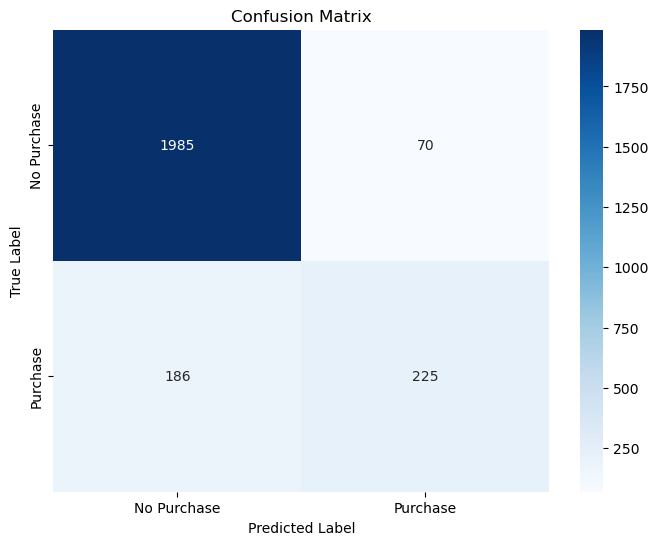

In [10]:
# Plot the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Importance

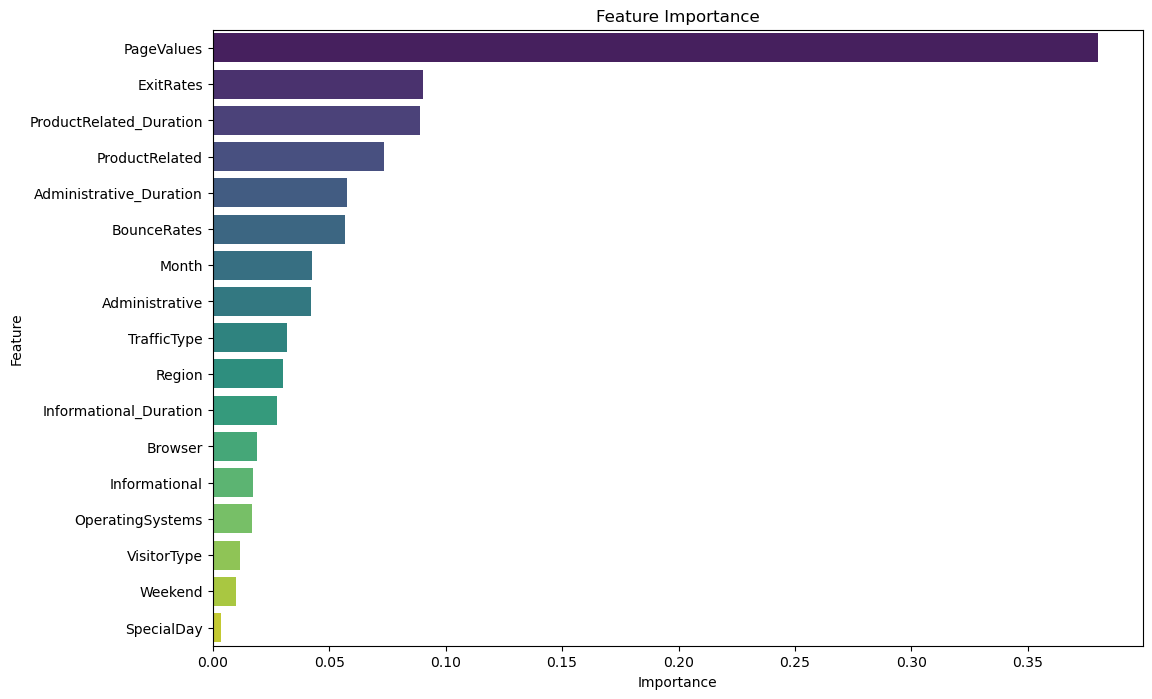

                    Feature  Importance
8                PageValues    0.380325
7                 ExitRates    0.090466
5   ProductRelated_Duration    0.088783
4            ProductRelated    0.073416
1   Administrative_Duration    0.057751
6               BounceRates    0.056860
10                    Month    0.042687
0            Administrative    0.041981
14              TrafficType    0.031860
13                   Region    0.030140
3    Informational_Duration    0.027682
12                  Browser    0.019187
2             Informational    0.017108
11         OperatingSystems    0.016892
15              VisitorType    0.011660
16                  Weekend    0.009813
9                SpecialDay    0.003389


In [11]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette="viridis", dodge=False, legend=False)
plt.title('Feature Importance')
plt.show()

# Display the sorted feature importances
print(feature_importance_df)

## ROC curve (Optional)

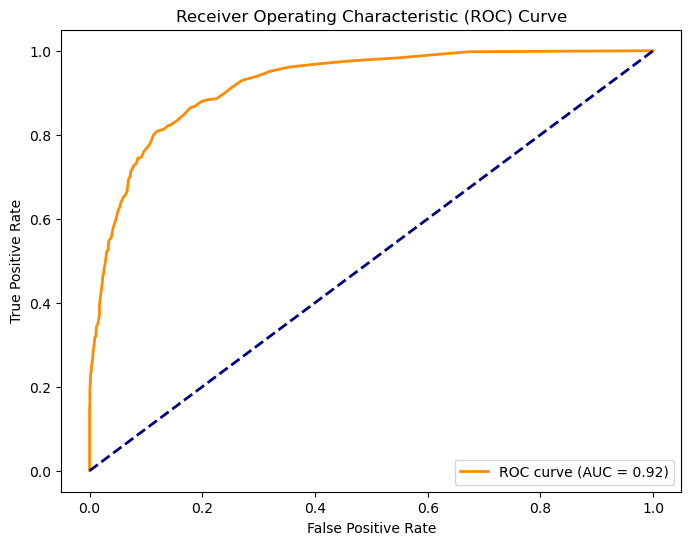

In [12]:
# Visualize ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning (Optional)

### - GridSearchCV

In [13]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# After running above code, update the model with the best parameters found during the grid search

### - Randomized Search CV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

# Modelling (Logistic Regression)

In [16]:
# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8690186536901865

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466


Confusion Matrix:
 [[2002   53]
 [ 270  141]]


# Modelling (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_value = 5  # The number of neighbors (k) can be adjust
model = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 86.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2055
           1       0.68      0.36      0.47       411

    accuracy                           0.87      2466
   macro avg       0.78      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466

